# Analyzing data run 5

* Particle: 100 nm gold 0.5 Hz, 3 V
* Recorded Framerate: 54.9661957895894
* This means that 1 oscillation happens in approximately **110 frames**

In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, push_notebook
from bokeh.models import HoverTool, CustomJS, Slider, ColumnDataSource
from bokeh.layouts import row, column, gridplot
import trackpy as tp
output_notebook()
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(30, 15))
mpl.rc('image', cmap='gray')
mpl.rc('xtick', labelsize=24)
mpl.rc('ytick', labelsize=24)

Loading BokehJS ...

In [3]:
file = h5py.File('data.h5')
data = file['Basler data'][:,:,:]
frames = np.linspace(1, data.shape[0], data.shape[0])

## Quick insight into the data

First, let's calculate the total intensity, in order to check if something changed during the acquisition.

In [4]:
intensities = np.sum(np.sum(data[:,:,:],1),1)
hover = HoverTool(tooltips=[("Frame", "@x")])
p = figure()
p.add_tools(hover)
p.line(frames, intensities, line_width=1)
show(p)

There are some sharp steps in the intensity. Frame **717** is one of them

In [7]:
p = figure(x_range=(1, 300), y_range=(1, 250))
hover = HoverTool(tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])
p.add_tools(hover)
img = np.squeeze(data[717, :, :])
source = ColumnDataSource(data=dict(image=[data[0, :, :]]))
p.image(image='image', x=1, y=1, dw=300, dh=250, source=source, palette="Spectral11")
s2 = figure()
s2.add_tools(hover)
s2.line(frames, intensities, line_width=2)
def update_image(frame):
    source.data = dict(image=[data[frame, :, :]])
    push_notebook(handle=bokeh_handle)  

callback = CustomJS(code="""
if (IPython.notebook.kernel !== undefined) {
    var kernel = IPython.notebook.kernel;
    cmd = "update_image(" + cb_obj.value + ")";
    kernel.execute(cmd, {}, {});
}
""")

slider = Slider(start=1, 
                end=2000,
                value=1,
                step=1,
                title="frame",
                callback=callback)
bokeh_handle = show(gridplot([p, slider], [s2, None]), notebook_handle=True)
output_file('test.html')

## Let's make a self-standing document with the data

In [13]:
from bokeh.io import curdoc
from bokeh.layouts import layout

p = figure(x_range=(1, 300), y_range=(1, 250))
hover = HoverTool(tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])
p.add_tools(hover)
img = np.squeeze(data[717, :, :])
source = ColumnDataSource(data=dict(image=[data[0, :, :]]))
p.image(image='image', x=1, y=1, dw=300, dh=250, source=source, palette="Spectral11")
s2 = figure()
s2.add_tools(hover)
s2.line(frames, intensities, line_width=2)
   

def slider_callback(attr, old, new):
    source.data = dict(image=[data[new, :, :]])
    
slider.on_change('value', slider_callback)

slider = Slider(start=1, 
                end=2000,
                value=1,
                step=1,
                title="Frame")


lyt = layout([p, slider], [s2]) 
curdoc().add_root(lyt)
output_file('test.html')

In [15]:
median_data = np.median(data, 0)
data_bkg = data - median_data
avg_data = np.sum(data[:100,:,:], 0)

In [48]:
f = tp.locate(data[10, :,:], 7)
len(f)

427

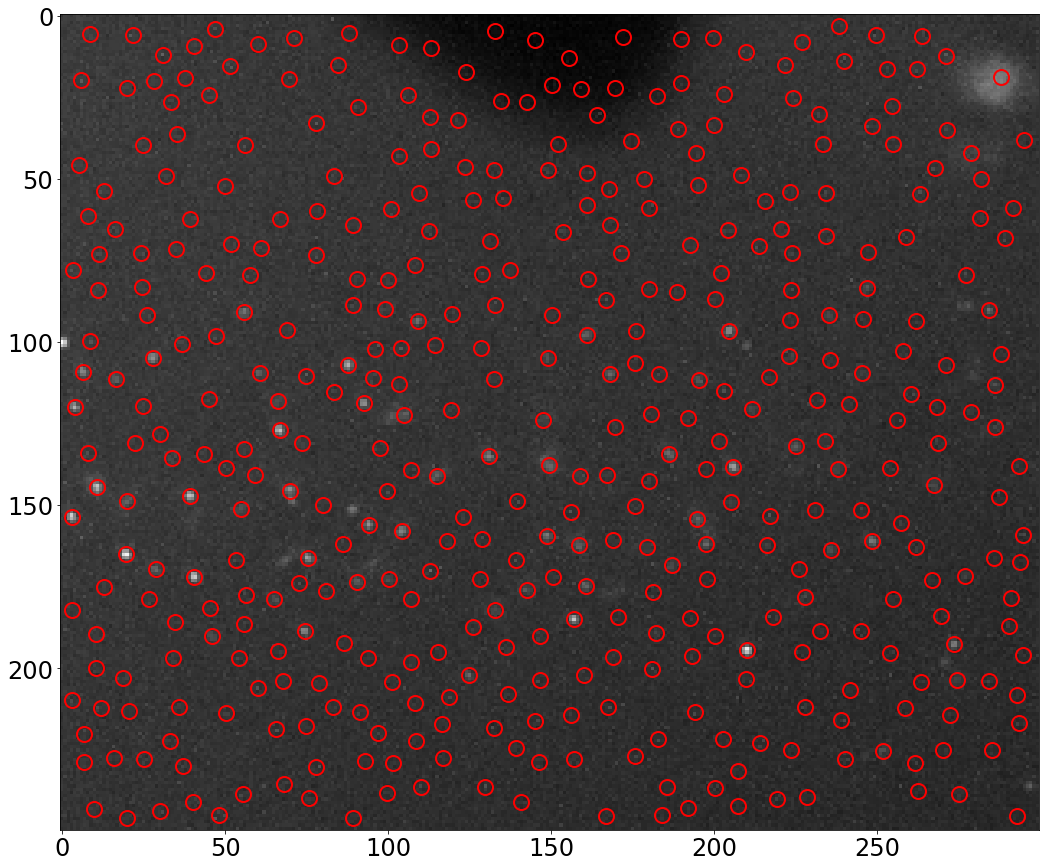

In [29]:
plt.figure()  # make a new figure
tp.annotate(f, data[10, : ,:]);

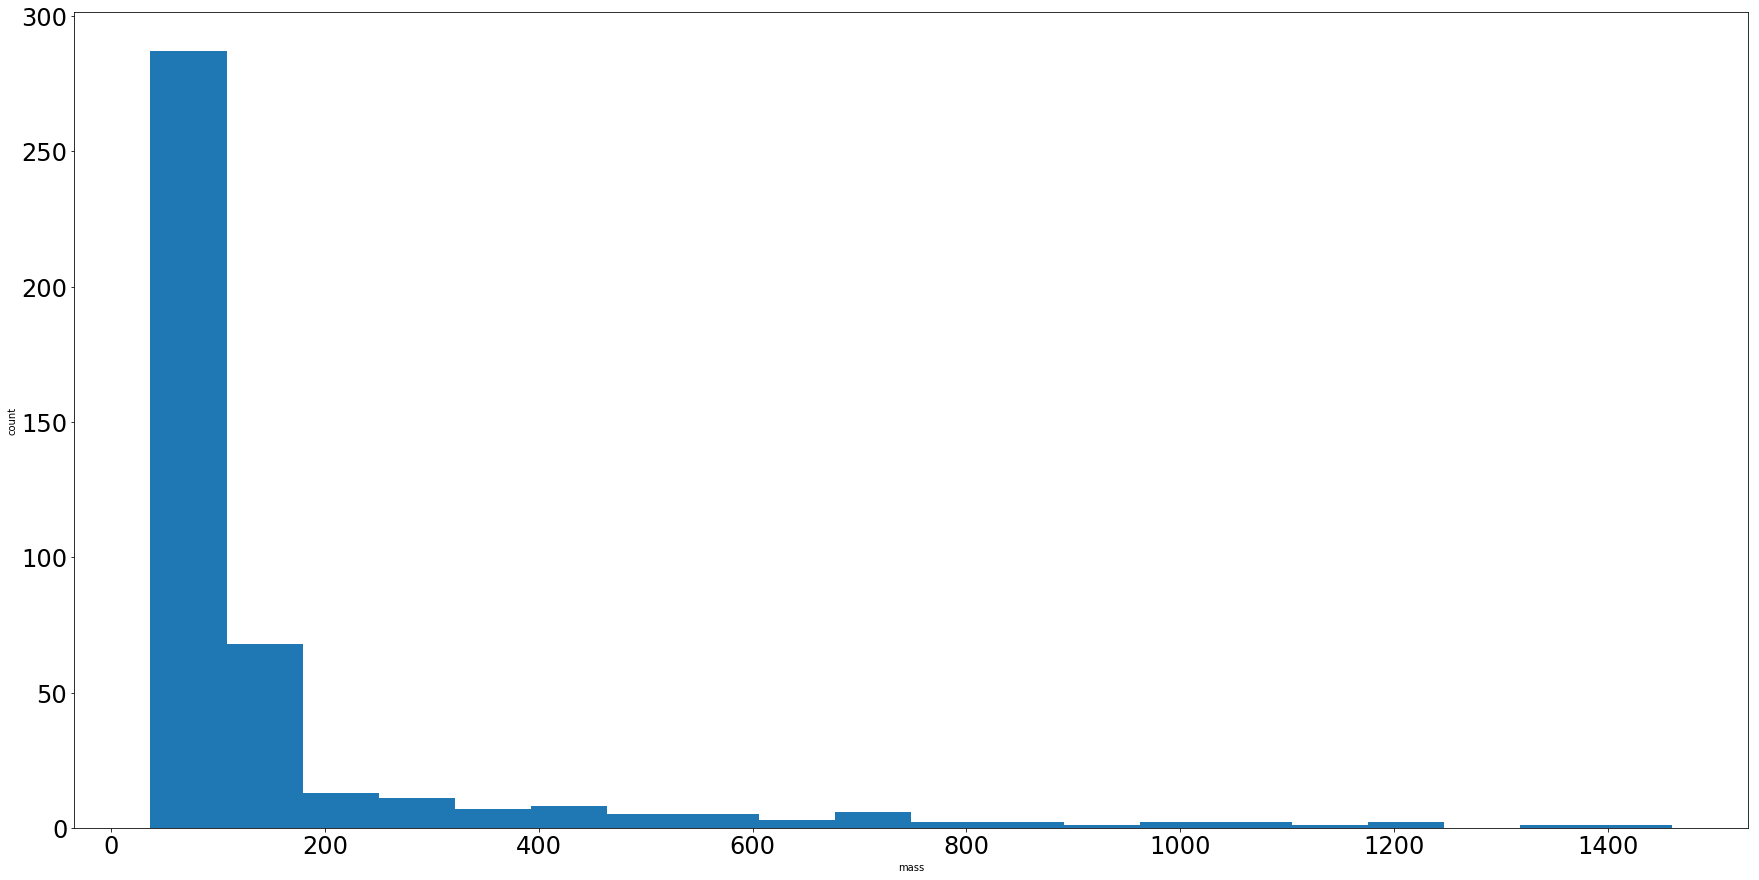

In [30]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

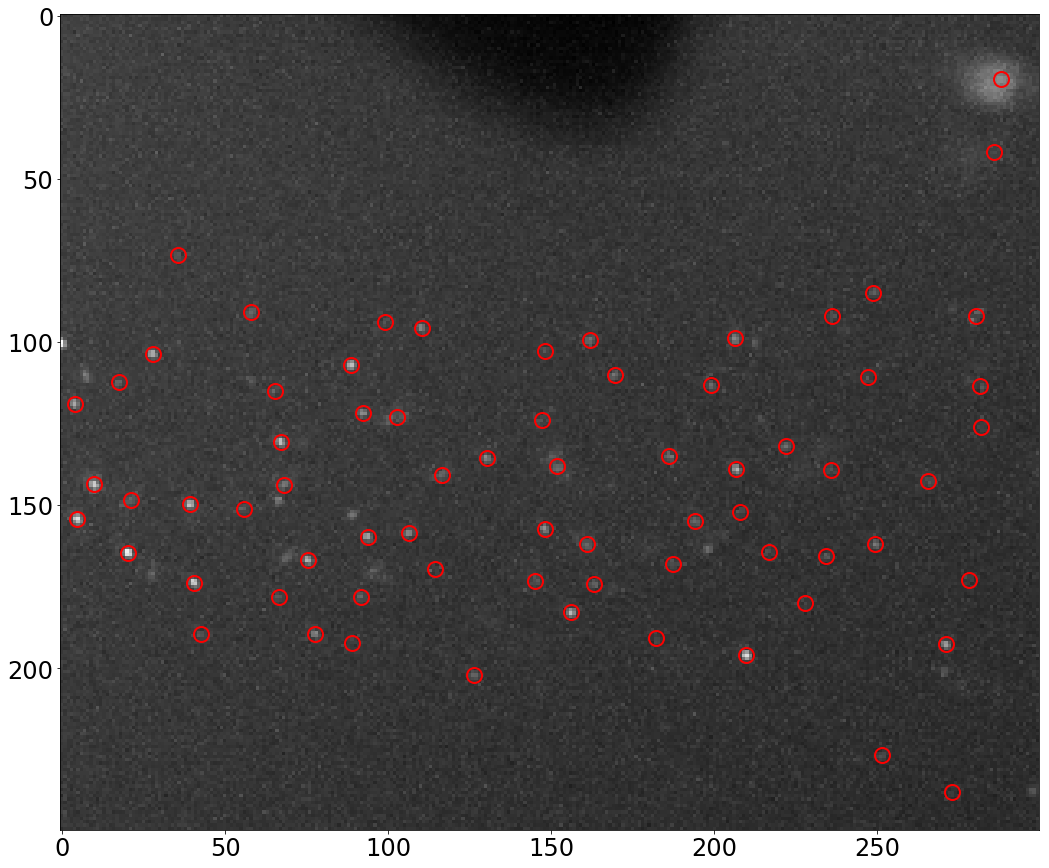

In [50]:
f = tp.locate(data[0, :,:], 9, minmass=250)
plt.figure()  # make a new figure
tp.annotate(f, data[0, : ,:]);

<Figure size 2160x1080 with 0 Axes>

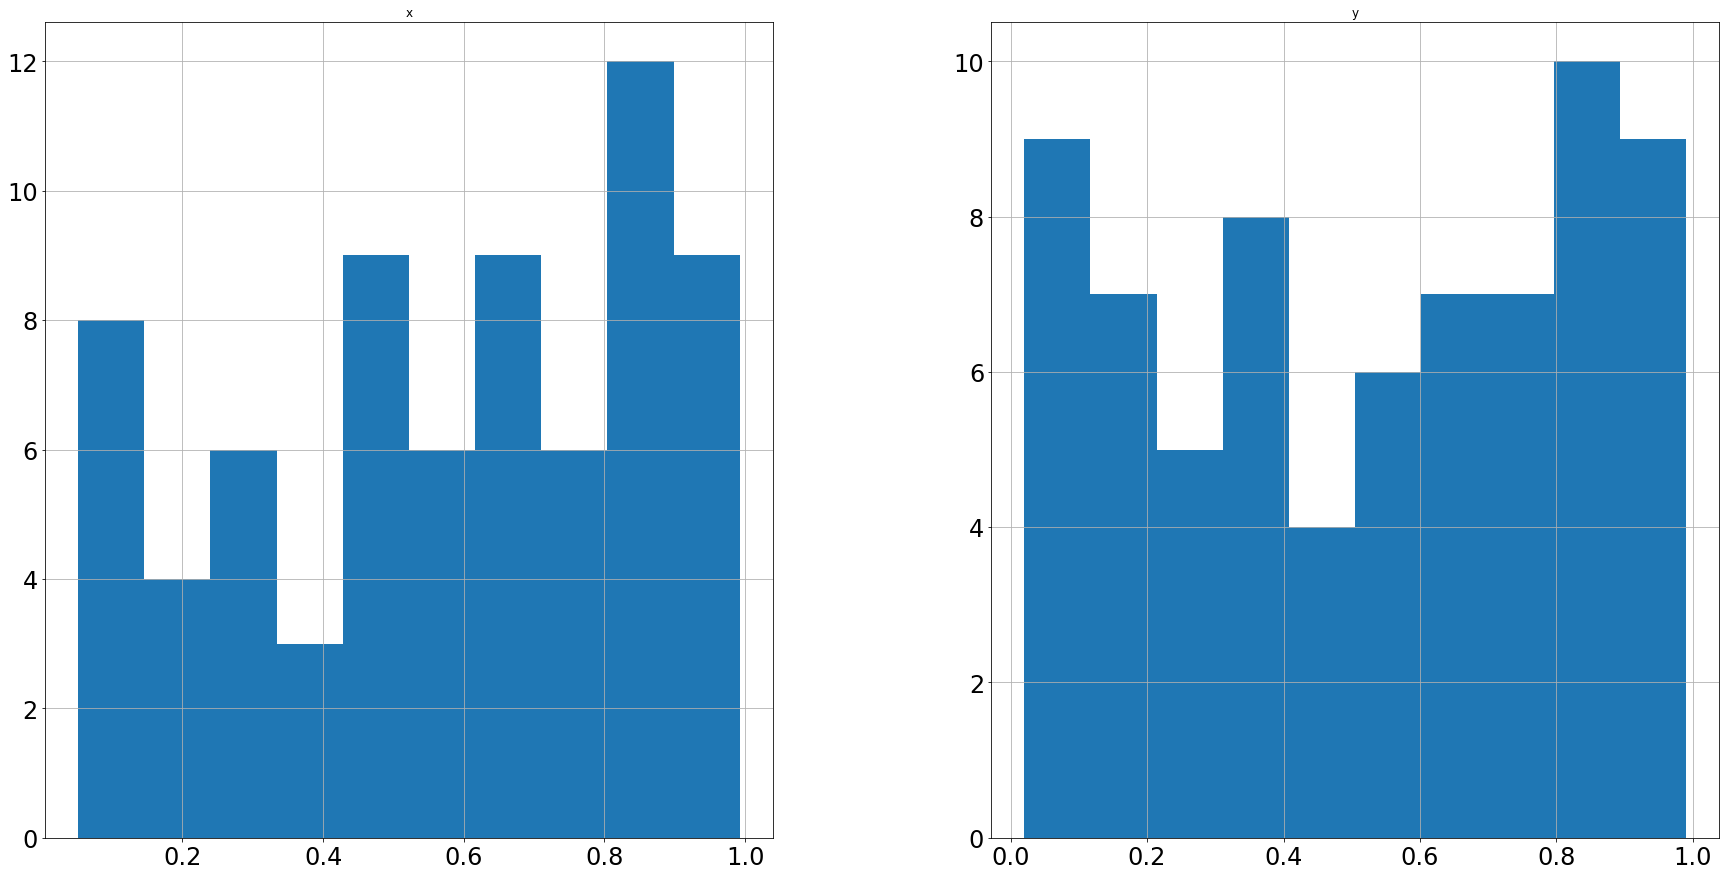

In [39]:
plt.figure()
tp.subpx_bias(f);

In [42]:
f = tp.batch(data[:], 9, minmass=250);

Frame 1999: 70 features


In [43]:
t = tp.link_df(f, 5, memory=3)

Frame 1999: 70 trajectories present.


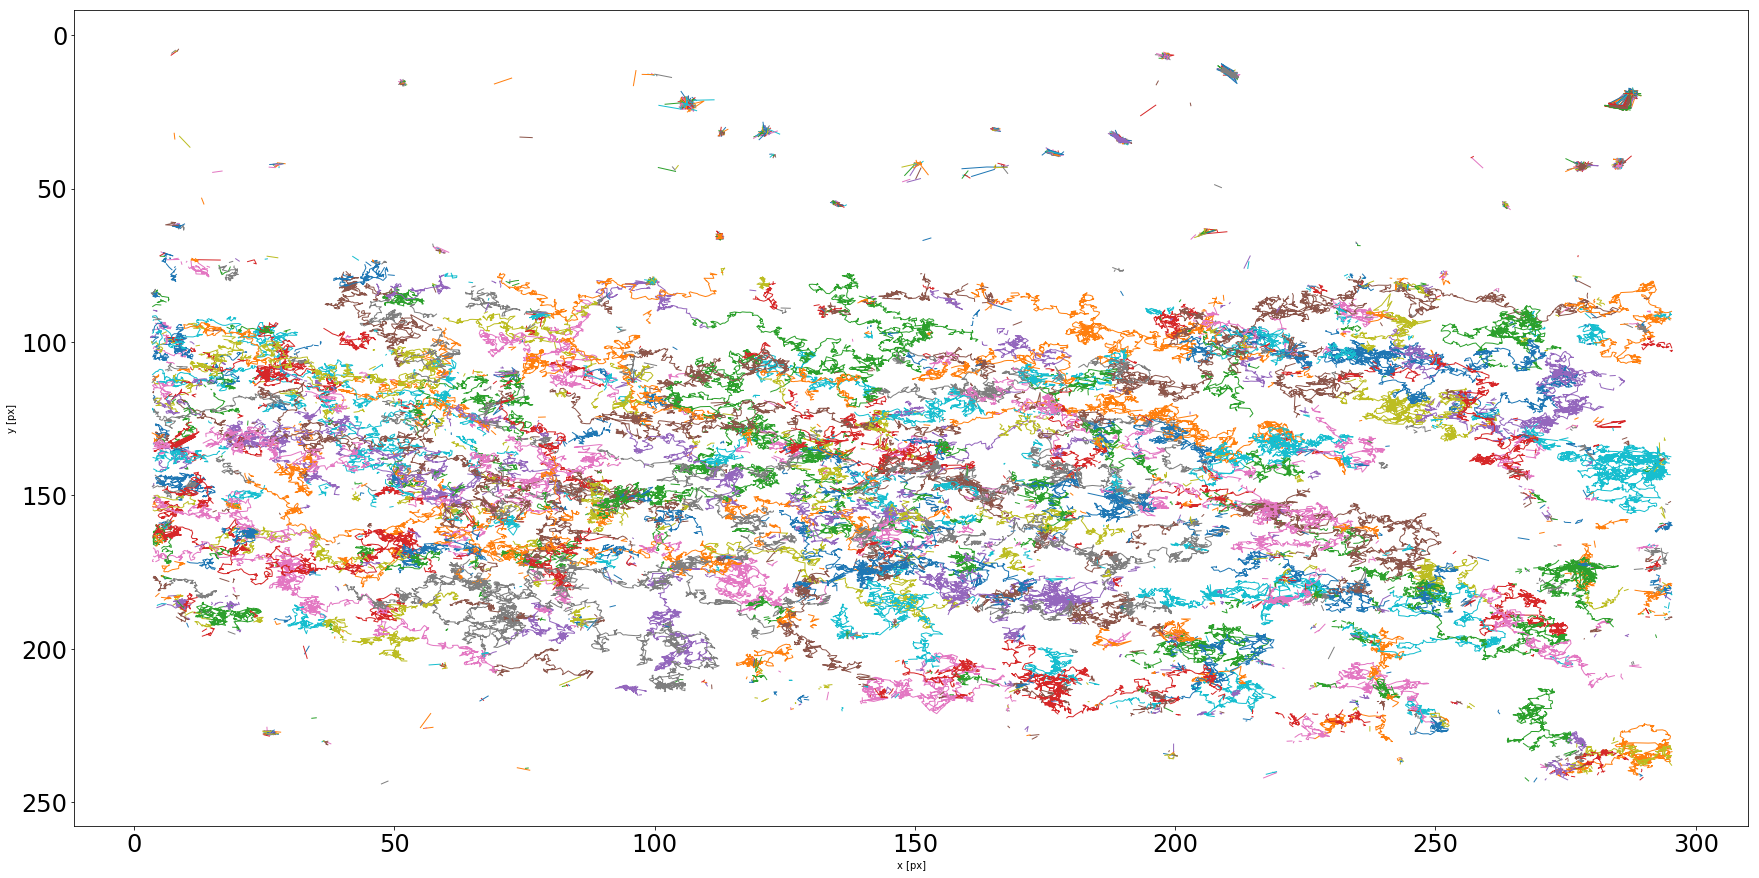

In [44]:
plt.figure()
tp.plot_traj(t);

<Figure size 2160x1080 with 0 Axes>

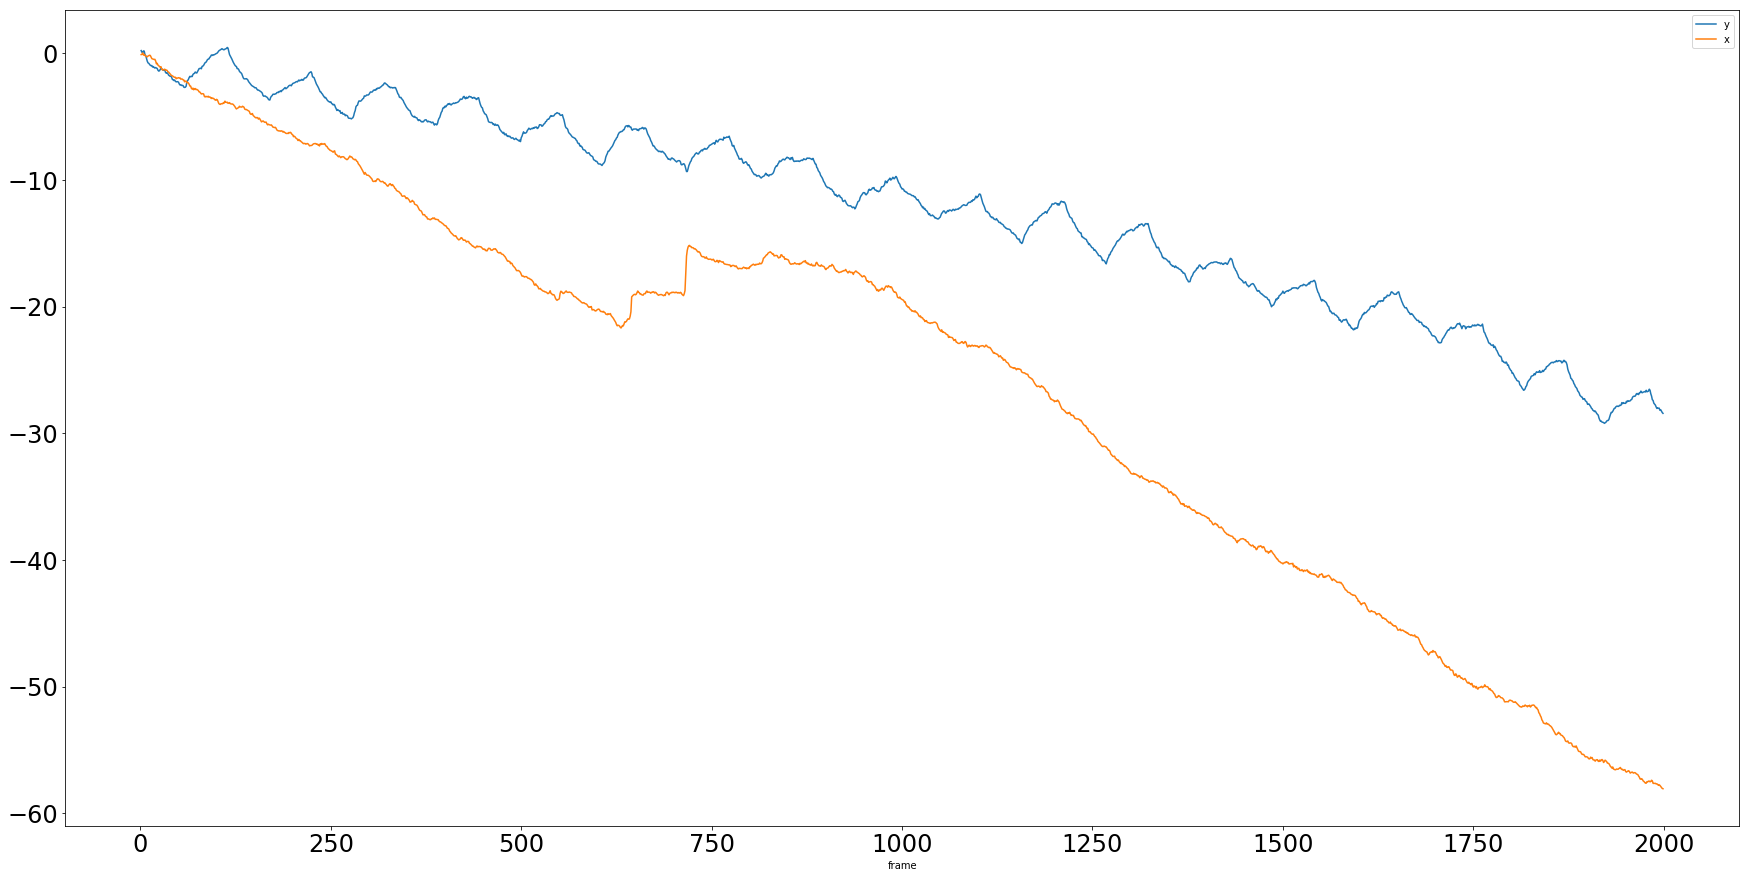

In [46]:
d = tp.compute_drift(t)
plt.figure()
d.plot()

In [51]:
centers = tp.locate(data[0, :, :], 9, minmass=250)

In [53]:
centers

,y,x,mass,size,ecc,signal,raw_mass,ep
24,19.279331,287.978261,1331.171528,2.598441,0.087597,47.036181,17246.0,0.073218
56,41.778004,285.873185,319.671704,2.467407,0.113356,14.875707,9418.0,0.407738
103,73.412278,35.545402,274.439906,1.722127,0.239570,29.056678,9393.0,0.413775
120,84.793716,248.786881,431.070647,1.542553,0.153934,51.079157,8519.0,0.857852
125,90.883141,58.103183,609.370065,1.651916,0.145978,60.310136,10048.0,0.298120
126,91.873194,235.954205,296.459169,1.606830,0.054403,34.112810,8304.0,1.165577
131,92.063472,280.215233,815.893123,2.085020,0.423967,56.575932,9398.0,0.412554
132,93.802287,98.909132,327.342745,2.222877,0.193159,22.546747,9235.0,0.456495
135,95.586337,110.259899,795.556021,1.541287,0.078665,89.839621,9734.0,0.344247
138,99.374630,161.816246,758.310467,1.708559,0.155649,72.535555,9627.0,0.363408
